In [1]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.5/706.5 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 KB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.1/185.1 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

import pickle
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


**Loading the dataset**

In [3]:
df = pd.read_csv('Khammam.csv')
df.drop_duplicates(subset=None, inplace=True)
df.tail()

,district,date,min-temp,max-temp
1333,Khammam,2019-12-27,22.60,32.60
1334,Khammam,2019-12-28,21.55,32.70
1335,Khammam,2019-12-29,20.40,32.60
1336,Khammam,2019-12-30,19.10,30.90
1337,Khammam,2019-12-31,21.60,32.40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  1338 non-null   object 
 1   date      1338 non-null   object 
 2   min-temp  1338 non-null   float64
 3   max-temp  1338 non-null   float64
dtypes: float64(2), object(2)
memory usage: 52.3+ KB


In [5]:
df.dtypes

district     object
date         object
min-temp    float64
max-temp    float64
dtype: object

In [6]:
df ['date'] = pd.to_datetime(df ['date'])
df.tail()

,district,date,min-temp,max-temp
1333,Khammam,2019-12-27,22.60,32.60
1334,Khammam,2019-12-28,21.55,32.70
1335,Khammam,2019-12-29,20.40,32.60
1336,Khammam,2019-12-30,19.10,30.90
1337,Khammam,2019-12-31,21.60,32.40


In [8]:
df.date.unique()

array(['2022-01-01T00:00:00.000000000', '2022-01-02T00:00:00.000000000',
       '2022-01-03T00:00:00.000000000', ...,
       '2019-12-29T00:00:00.000000000', '2019-12-30T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

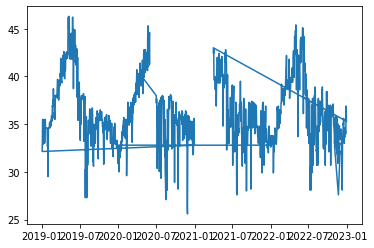

In [9]:
plt.plot(df ['date'], df ['max-temp'])
plt.show()

In [10]:
new_column = df[['date', 'max-temp']] 
new_column.dropna(inplace=True)
new_column.columns = ['ds', 'y'] 
new_column.tail()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
1333,2019-12-27,32.60
1334,2019-12-28,32.70
1335,2019-12-29,32.60
1336,2019-12-30,30.90
1337,2019-12-31,32.40


In [11]:
new_column

,ds,y
0,2022-01-01,32.80
1,2022-01-02,32.60
2,2022-01-03,33.00
3,2022-01-04,33.80
4,2022-01-05,32.80
...,...,...
1333,2019-12-27,32.60
1334,2019-12-28,32.70
1335,2019-12-29,32.60
1336,2019-12-30,30.90


**Training the forecasting model**

In [12]:
n = NeuralProphet()
model = n.fit(new_column, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.552% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 

Finding best initial lr:   0%|          | 0/228 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

**Forecasting the temperature into the future**

In [13]:
future = n.make_future_dataframe(new_column, periods=370)
forecast = n.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.235% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.235% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.73% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.73% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.73% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.73% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equ

Predicting: 42it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-01-01,None,33.35,36.50,-3.18,0.03
1,2023-01-02,None,33.43,36.50,-3.19,0.12
2,2023-01-03,None,33.31,36.50,-3.18,-0.01
3,2023-01-04,None,33.40,36.50,-3.18,0.08
4,2023-01-05,None,33.40,36.50,-3.17,0.07


**visualize these predictions**

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


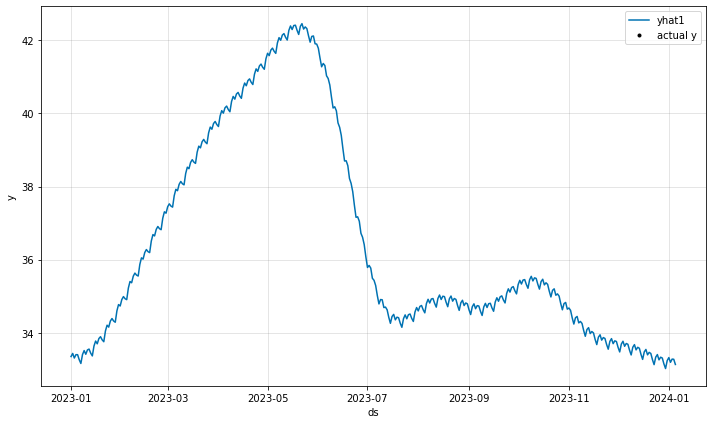

In [14]:
plot = n.plot(forecast)

**Daily-Data Prediction**

In [15]:
Khammam_forecast = forecast[['ds', 'yhat1']]
Khammam_forecast = Khammam_forecast[:365]

In [16]:
data= Khammam_forecast[['ds', 'yhat1']] 
data.dropna(inplace=True)
data.columns = ['date', 'max-Temp'] 
data.tail()

,date,max-Temp
360,2023-12-27,33.33
361,2023-12-28,33.31
362,2023-12-29,33.15
363,2023-12-30,33.02
364,2023-12-31,33.24


In [19]:
data.to_csv('Khammam2023.csv')